In [2]:
import pandas as pd
from pprint import pprint
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np


In [11]:


dirs = ['R1398','R1399','R1400','R1401','U1398','U1399','U1400','U1401']

dir = dirs[0]
total_df=pd.read_csv(f'{dir}/clus_data/{dir}_total.csv')
def f(col1,col2):
    return col1/col2

total_df['total_income']=total_df.apply(lambda x :f(x.total_income,x.member),axis=1)
total_df['total_cost']=total_df.apply(lambda x :f(x.total_cost,x.member),axis=1)
total_df

,Address,member,Male_count,Female_count,age,literacy,studying,degree,occupationalst,maritalst,...,construction,material,vehicle,motorcycle,cookingfuel,heatingfuel,waterheatingfuel,facilities,total_cost,total_income
0,20001383908,4,3,1,17.750000,0.75,0.250000,1,4,1,...,3,4,0,1,3,3,4,7,2.387714e+07,9.096000e+07
1,20001383911,2,1,1,69.000000,0.50,0.000000,3,1,1,...,3,7,0,0,3,3,4,5,2.585810e+07,2.696000e+07
2,20001383915,2,1,1,60.500000,1.00,0.000000,3,4,1,...,3,4,1,0,3,3,4,8,1.887339e+07,1.127100e+08
3,20001383916,4,1,3,23.500000,1.00,0.500000,3,3,1,...,3,4,1,0,3,3,4,7,2.675132e+07,5.460000e+06
4,20001383920,5,4,1,16.400000,0.60,0.200000,9,5,2,...,3,4,0,0,3,3,4,8,6.004288e+06,5.460000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18425,23006709717,5,4,1,32.000000,1.00,0.200000,3,4,2,...,1,4,0,0,3,3,4,6,4.581700e+06,5.460000e+06
18426,23006709720,4,1,3,20.500000,0.75,0.250000,2,4,1,...,1,4,1,0,3,3,4,6,7.344625e+07,5.460000e+06
18427,23006709723,3,1,2,45.000000,1.00,0.333333,3,4,1,...,1,4,0,1,3,3,4,6,2.713233e+07,5.460000e+06
18428,23006709807,1,0,1,65.000000,1.00,0.000000,3,1,3,...,1,4,0,0,3,3,4,6,4.220240e+07,2.096600e+08


In [12]:
total_df.columns


Index(['Address', 'member', 'Male_count', 'Female_count', 'age', 'literacy',
       'studying', 'degree', 'occupationalst', 'maritalst', 'province', 'town',
       'tenure', 'room', 'space', 'construction', 'material', 'vehicle',
       'motorcycle', 'cookingfuel', 'heatingfuel', 'waterheatingfuel',
       'facilities', 'total_cost', 'total_income'],
      dtype='object')

min_max scaler

In [13]:
scaler = MinMaxScaler()
data_scaled =scaler.fit_transform(total_df)

standard scaler

In [6]:
# scaler = StandardScaler()
# data_scaled =scaler.fit_transform(total_df)


<Axes: >

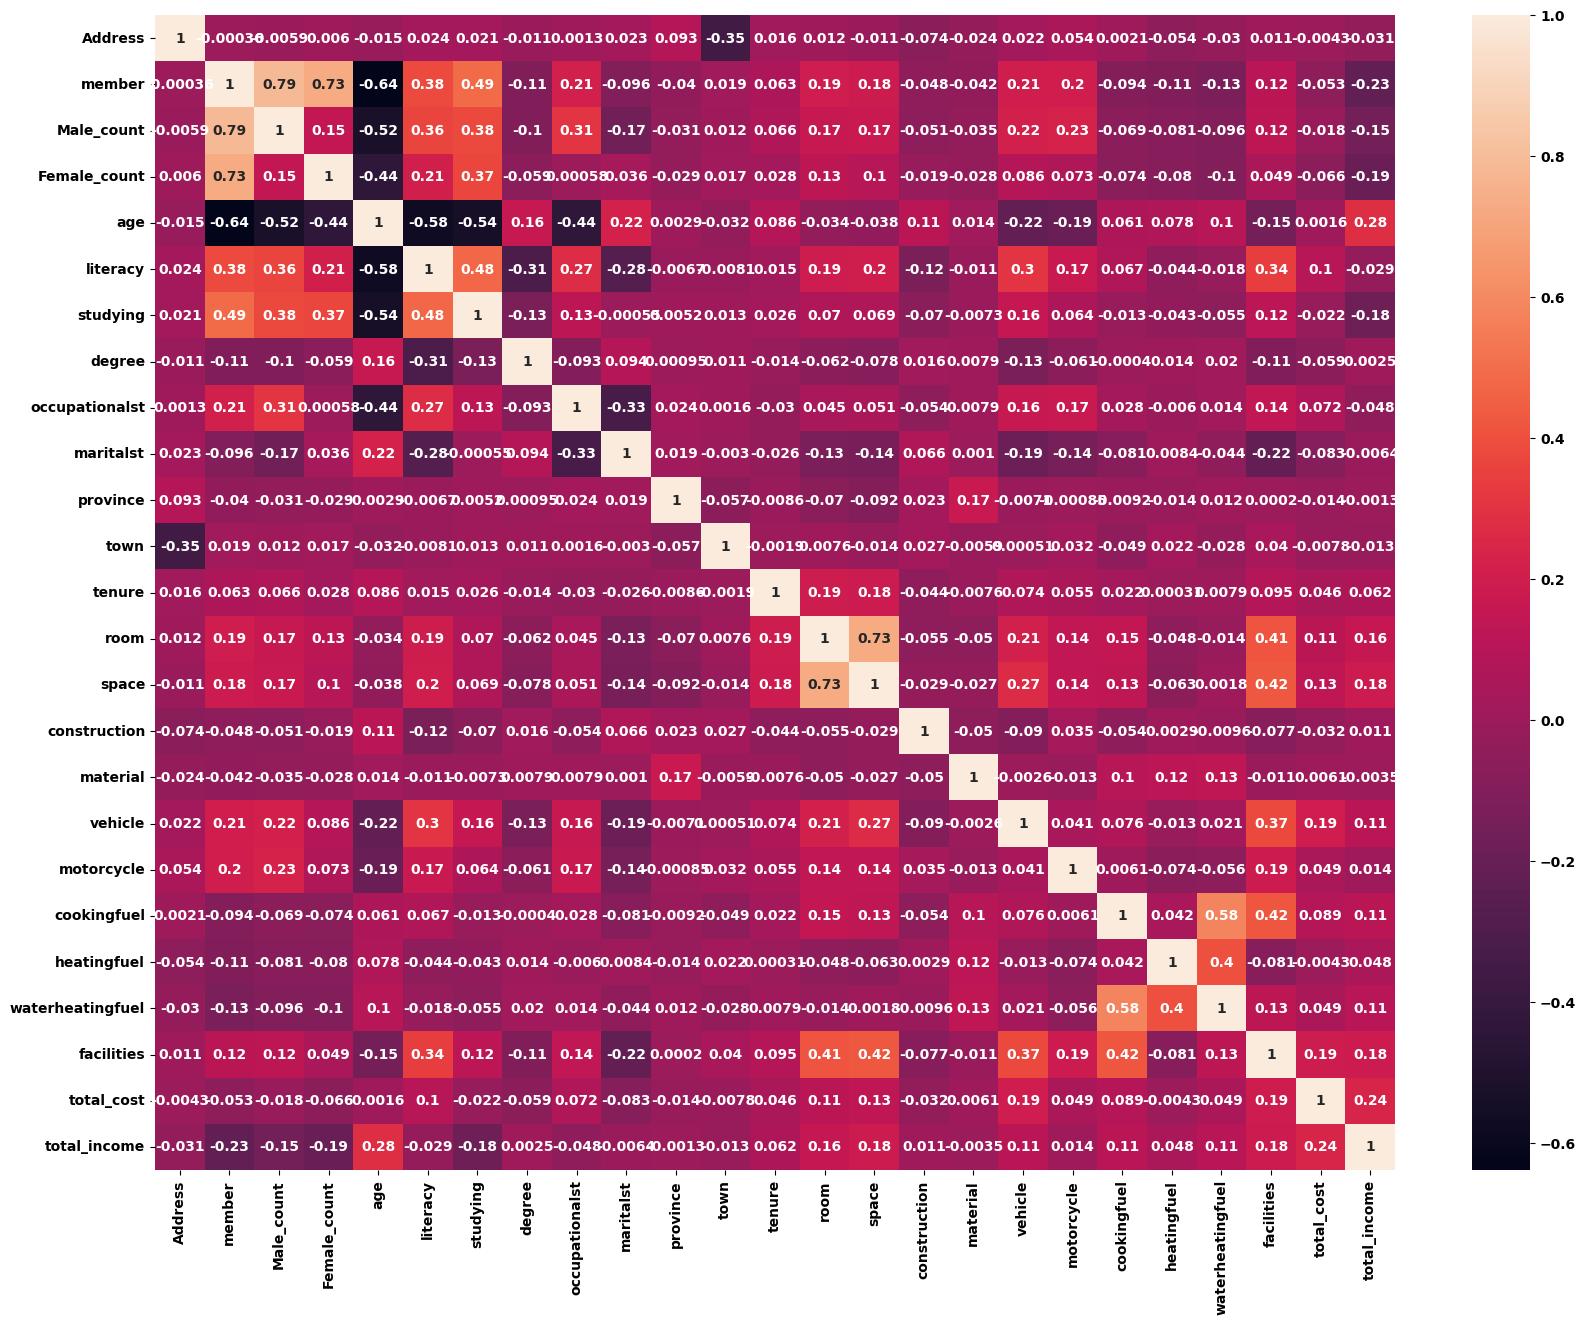

In [14]:
corr = pd.DataFrame(total_df).select_dtypes('number').corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

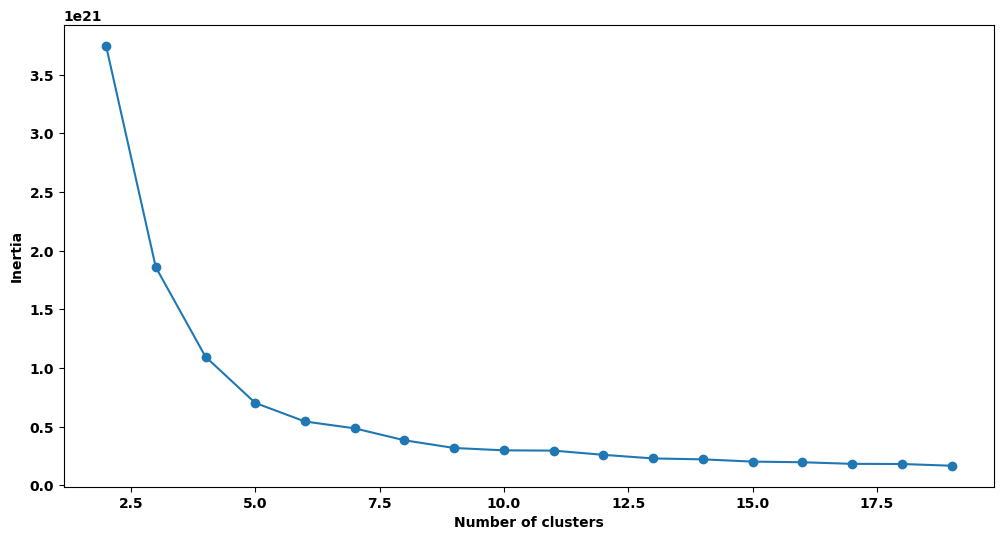

In [15]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(total_df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig, ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.show()

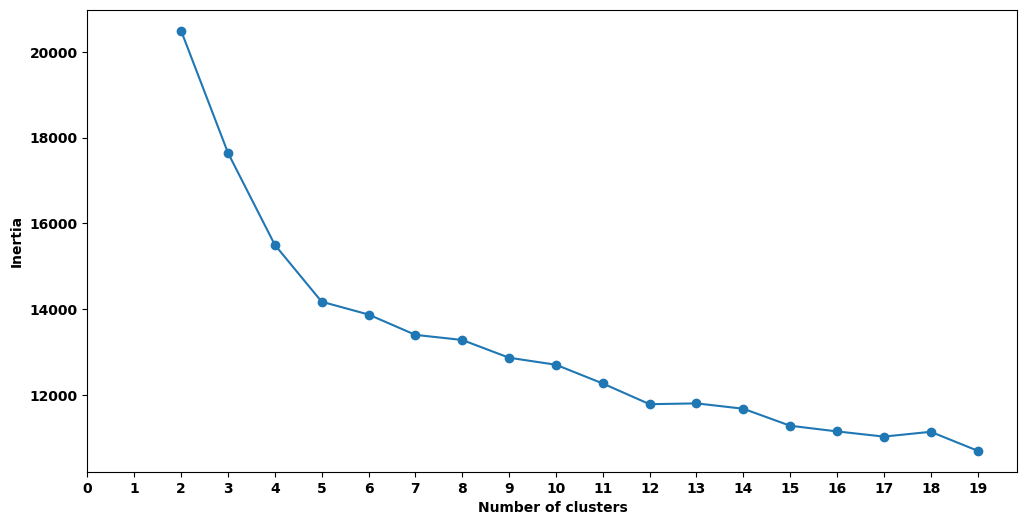

In [9]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.set_xticklabels(range(0,20))
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.show()

Silhouette 1

The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


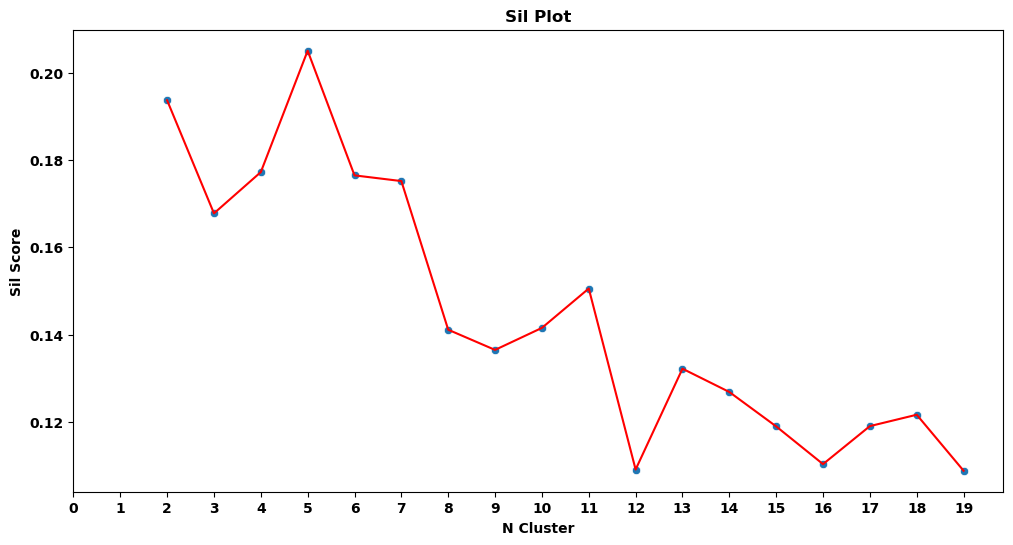

In [16]:

from sklearn.metrics import silhouette_score
df =data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++')
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

Silhouette 2

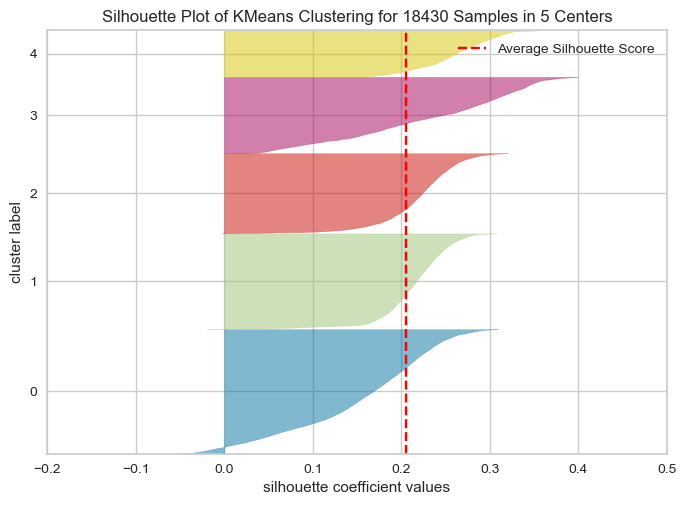

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 18430 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(5,random_state=42,init='k-means++')
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()    

Clustering after PCA

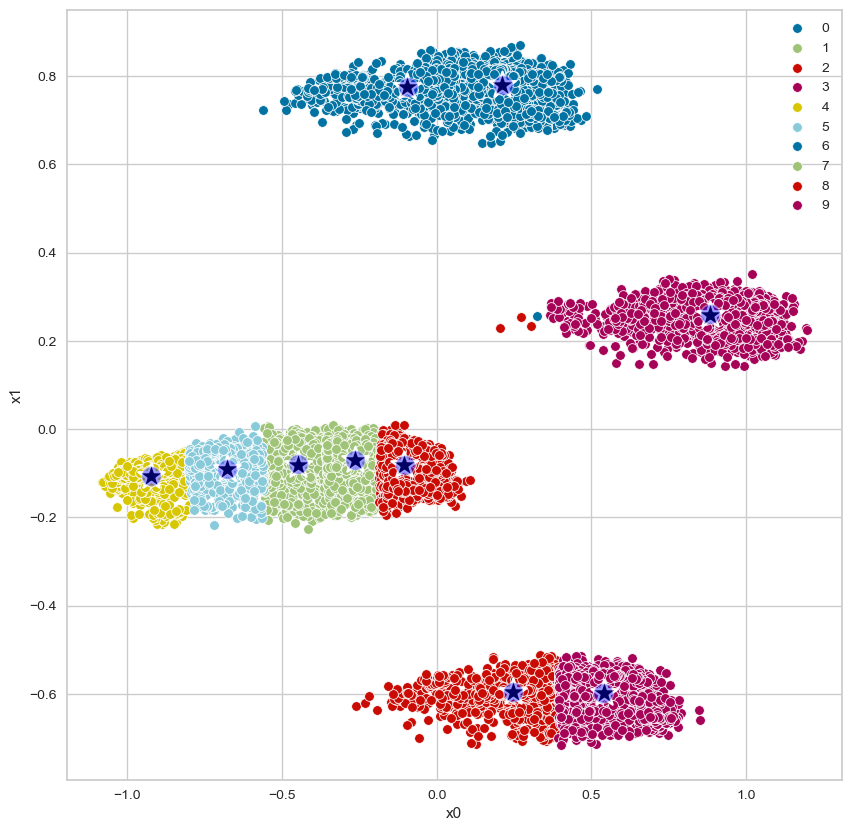

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(data_scaled)


from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

In [ ]:
# total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++").fit(data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, data_scaled)
closest

array([10426,  8372,  9787,  8215,  8944,  7026], dtype=int64)

In [1]:

col0='age'
col1 = 'literacy'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

NameError: name 'plt' is not defined

In [218]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,Address,member,Male_count,Female_count,age,literacy,studying,degree,occupationalst,maritalst,...,material,vehicle,motorcycle,cookingfuel,heatingfuel,waterheatingfuel,facilities,total_cost,total_income,Clusters
7026,21010508508,4,2,2,36.50,0.75,0.25,3,4,1,...,4,1,0,3,3,4,6,419571300.0,592030000.0,5
9787,21506559514,4,3,1,20.25,0.75,0.25,4,4,1,...,4,1,0,3,3,4,6,520537552.0,355220000.0,2
8372,21210534623,5,3,2,31.20,0.60,0.20,6,4,1,...,4,0,1,3,3,4,5,47530440.0,281040000.0,1
8215,21205531511,4,2,2,36.00,0.75,0.25,3,4,1,...,4,0,0,3,3,4,5,63603152.0,266940000.0,3
10426,21607570320,1,0,1,66.00,0.00,0.00,6,1,3,...,4,0,0,3,3,4,3,64075000.0,180660000.0,0
8944,21309544623,4,2,2,46.25,0.75,0.25,3,4,1,...,4,1,1,3,3,4,6,250988714.0,51140000.0,4


خانوار های تک نفری

In [178]:
pca = PCA(15)


df = pca.fit_transform(data_scaled)


from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

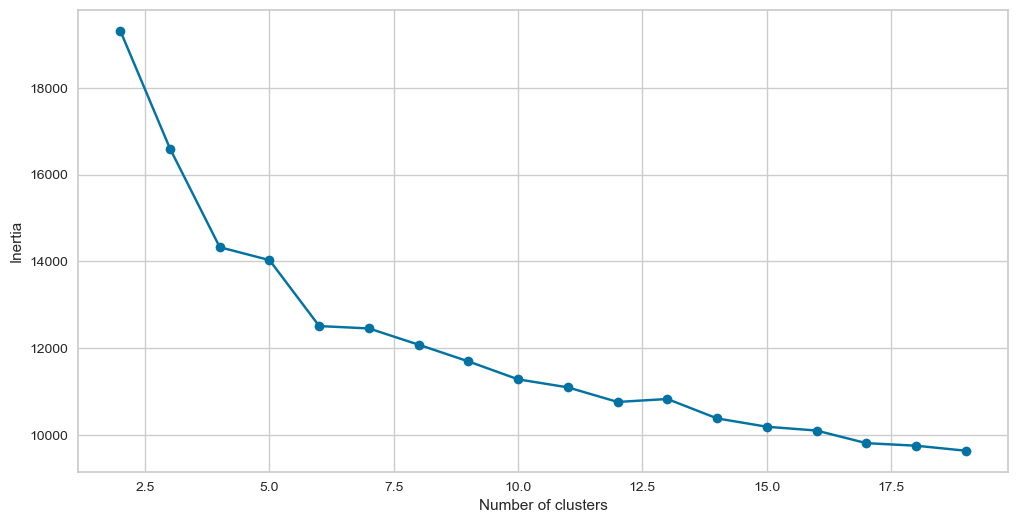

In [179]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig, ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.show()

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


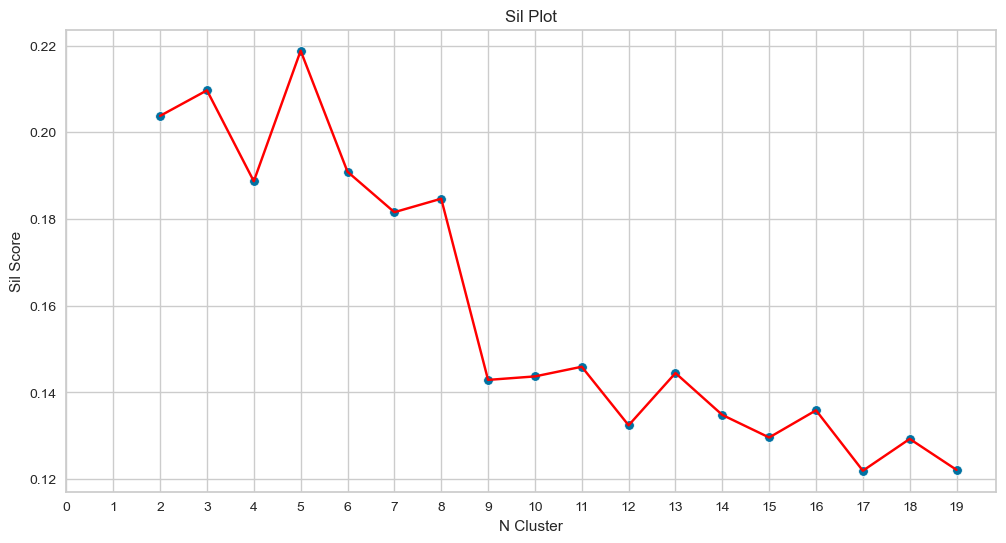

In [180]:
from sklearn.metrics import silhouette_score
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++')
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

In [14]:
# clusters_dict = {}
# for i in u_labels:
#     clusters_dict[f'cluster_{i}']=total_df[label == i , ].values.tolist()


# clusters_dict

In [26]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=10).fit(data_scaled)
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, data_scaled)
closest

array([ 9800, 10455,  6115, 11047, 10399, 10086, 13700,  9192, 11075,
        3471], dtype=int64)

In [29]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,Address,member,Male_count,Female_count,age,literacy,studying,degree,occupationalst,maritalst,...,construction,material,vehicle,motorcycle,cookingfuel,heatingfuel,waterheatingfuel,facilities,total_cost,total_income
9192,21404549017,4,2,2,35.750000,1.000000,0.25,3,4,1,...,3,4,1,0,3,3,4,7,472915248.0,552000000.0
9800,21506559720,4,2,2,25.250000,0.750000,0.25,3,4,1,...,3,4,0,0,2,4,3,2,29487552.0,201840000.0
10086,21601564711,4,2,2,34.750000,1.000000,0.25,3,4,1,...,3,4,0,0,3,3,4,6,53033100.0,178640000.0
10399,21607569911,3,1,2,65.666667,0.333333,0.00,6,1,1,...,3,4,0,0,3,3,4,4,11703164.0,103960000.0
11075,21707581308,2,1,1,39.500000,0.500000,0.00,6,1,3,...,3,4,0,0,3,3,4,6,15454388.0,76120000.0
3471,20508446123,4,2,2,36.750000,0.750000,0.25,6,4,1,...,3,4,0,0,3,3,4,6,90925520.0,59050000.0
11047,21706580814,5,2,3,19.200000,0.800000,0.40,3,3,2,...,3,4,0,0,3,3,4,6,32506940.0,47935000.0
10455,21608570816,1,0,1,72.000000,0.000000,0.00,6,1,3,...,3,4,0,0,3,3,4,3,9154500.0,44900000.0
13700,22207627311,5,3,2,27.000000,0.600000,0.20,3,4,2,...,3,2,0,0,2,0,1,3,17884740.0,27300000.0
6115,20913493920,4,2,2,19.000000,0.500000,0.25,3,4,1,...,3,4,0,0,3,3,4,5,14288264.0,20930000.0


In [67]:
# plt.subplots(figsize=(12,12))
# for i in u_labels:
#     plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
# plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
# plt.legend()
# plt.show()